In [2]:
file_name = 'players_dataset.csv'

df = pd.read_csv(file_name)

In [1]:
import pandas as pd

In [4]:
#one-hot encoding
encoded_positions = pd.get_dummies(df['Position'], prefix='Position')

# Converting boolean values to integers (1/0)
encoded_positions = encoded_positions.astype(int)
df_encoded = pd.concat([df, encoded_positions], axis=1)

print(df_encoded)

      Player name  Age  Height_cm Position  Overall   Potential  Skill_moves  \
0       E Haaland   21        195       ST        90         95            3   
1        K Mbappe   23        182       ST        94         94            5   
2          H Kane   28        188       ST        89         89            3   
3   R Lewandowski   33        185       CF        91         91            4   
4         L Messi   35        169      CAM        91         91            4   
..            ...  ...        ...      ...       ...        ...          ...   
95         J Doku   20        173       RW        76         85            4   
96      T Abraham   24        195       ST        81         85            3   
97     M Rashford   24        186       LW        85         88            5   
98         T Kubo   21        173       ST        78         85            4   
99       T Werner   26        180       ST        82         83            3   

    Weak_foot_rating  International_rep

In [5]:
#summary statistics
summary_stats = df.describe()
print(summary_stats)

             Age   Height_cm    Overall    Potential  Skill_moves  \
count  100.00000  100.000000  100.000000  100.000000   100.000000   
mean    26.61000  180.350000   83.440000   85.540000     3.920000   
std      4.34124    7.271607    3.088983    3.279628     0.676891   
min     19.00000  159.000000   76.000000   77.000000     3.000000   
25%     23.00000  175.000000   82.000000   83.000000     3.000000   
50%     26.00000  180.000000   83.000000   85.000000     4.000000   
75%     30.00000  186.000000   85.000000   88.000000     4.000000   
max     37.00000  195.000000   94.000000   95.000000     5.000000   

       Weak_foot_rating  International_reputation        Pace    Shooting  \
count        100.000000                100.000000  100.000000  100.000000   
mean           3.630000                  2.560000   81.650000   80.510000   
std            0.747454                  1.066667    7.687554    4.589173   
min            2.000000                  1.000000   55.000000   67.000

In [13]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 934.8 kB/s eta 0:00:00a 0:00:01


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

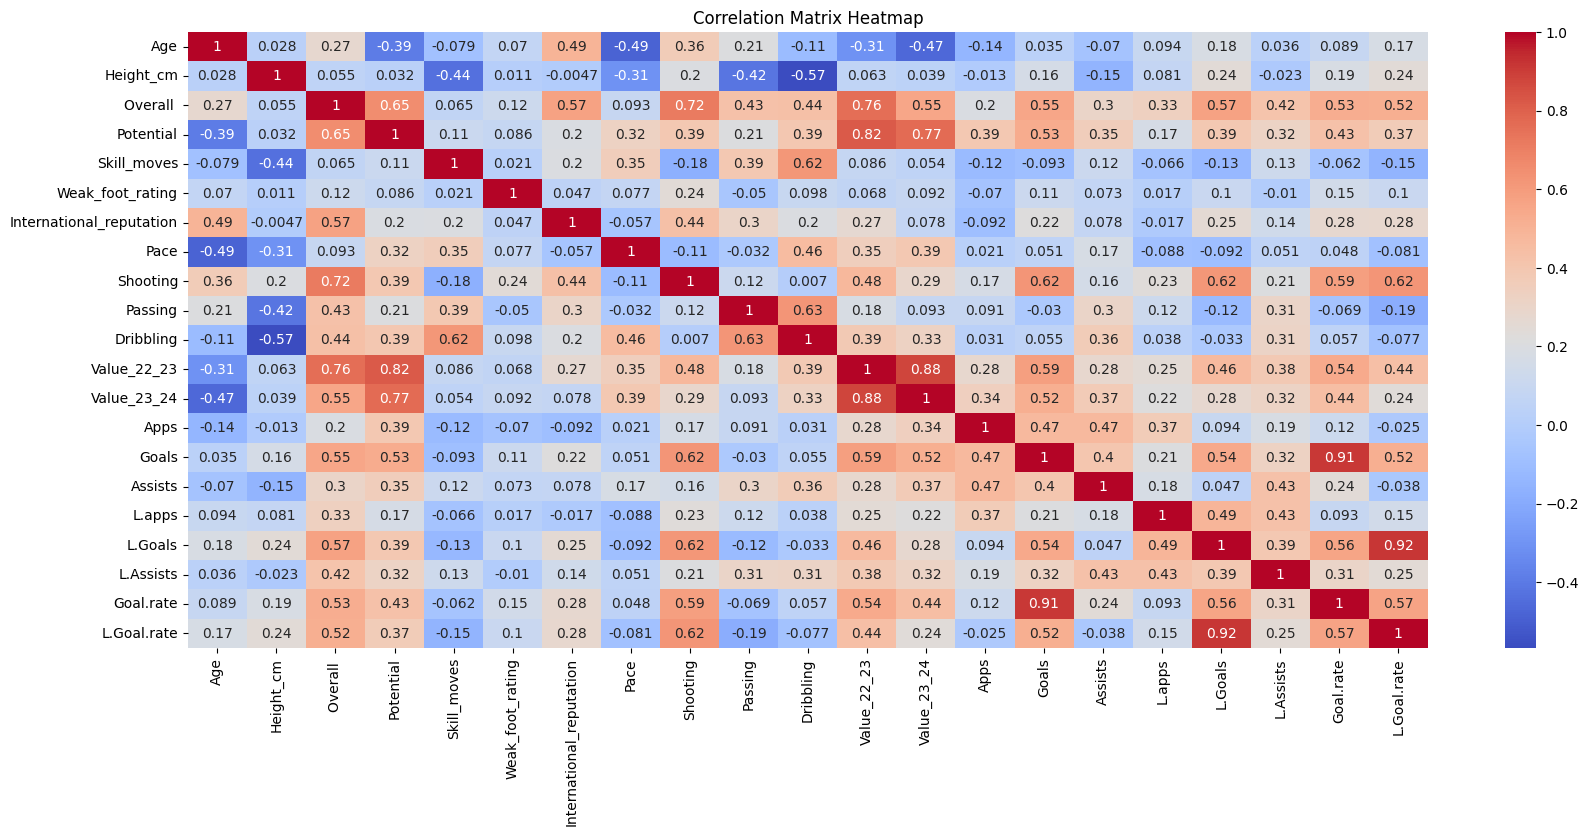

In [7]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 8))

#correlation matrix heatmap
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
!pip install seaborn matplotlib

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [10]:
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

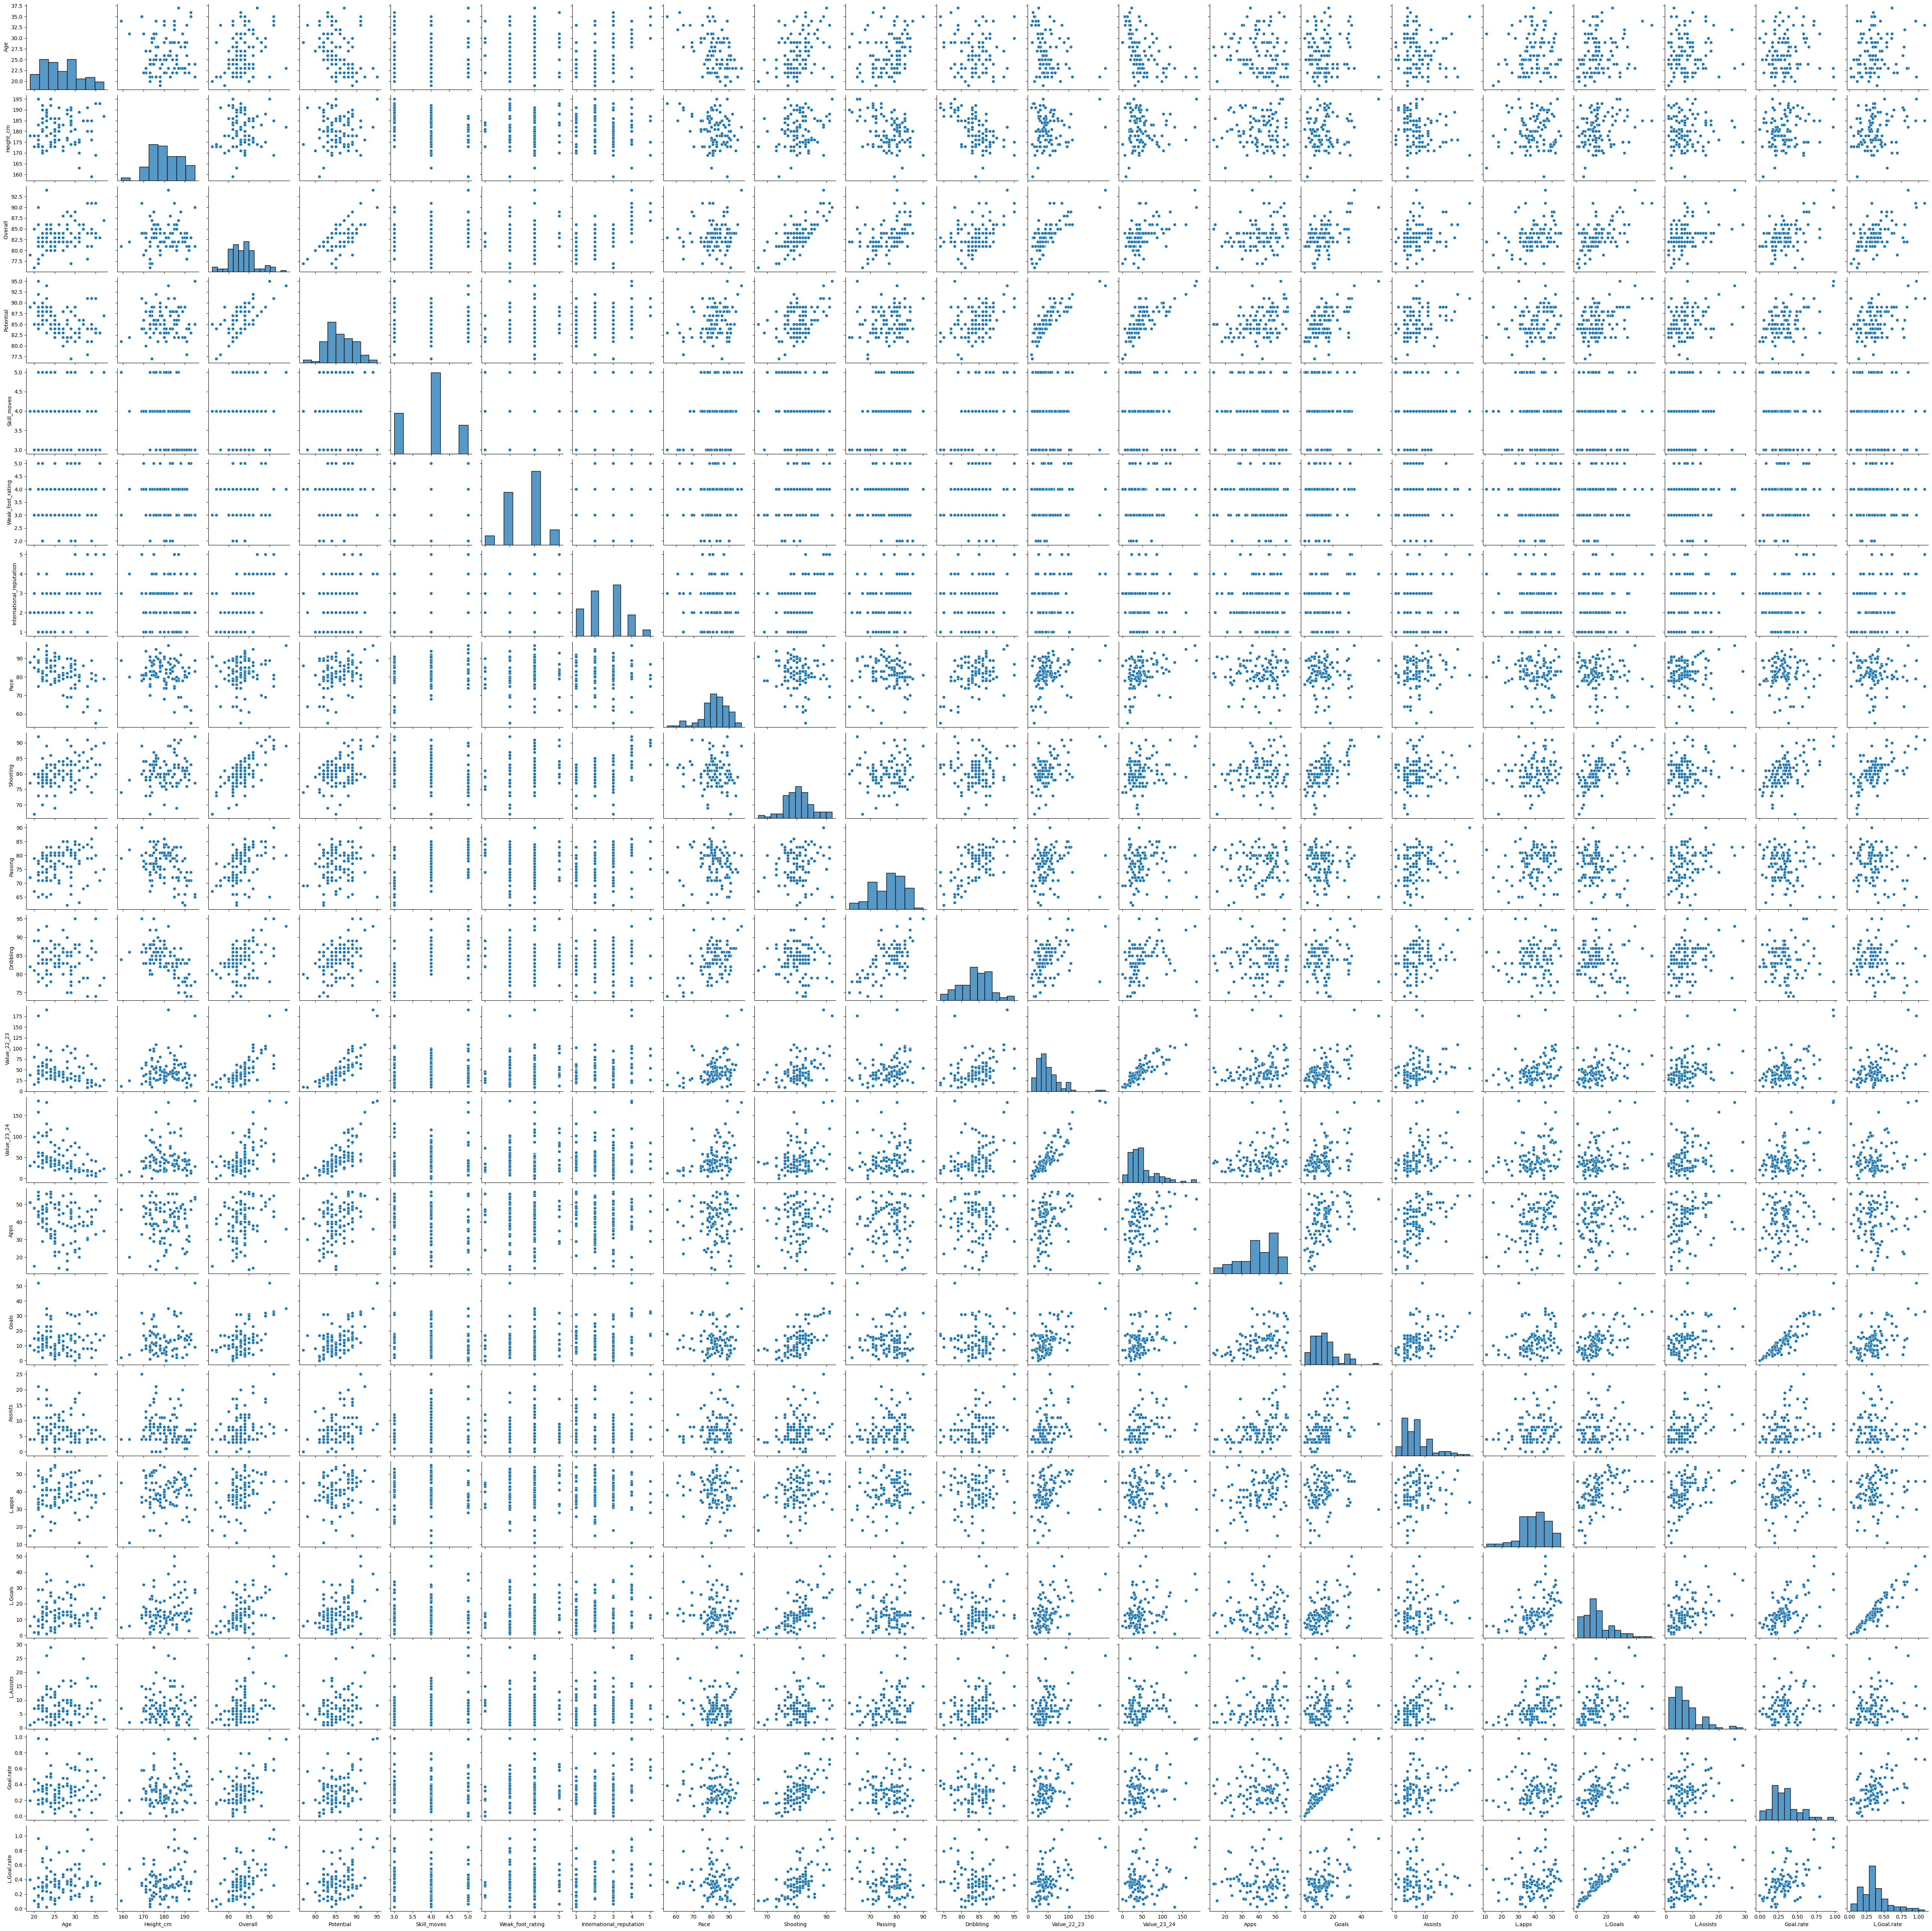

In [11]:
sns.pairplot(numeric_df)

Text(0.5, 1.0, 'Pairwise Relationships Between Numerical Features')

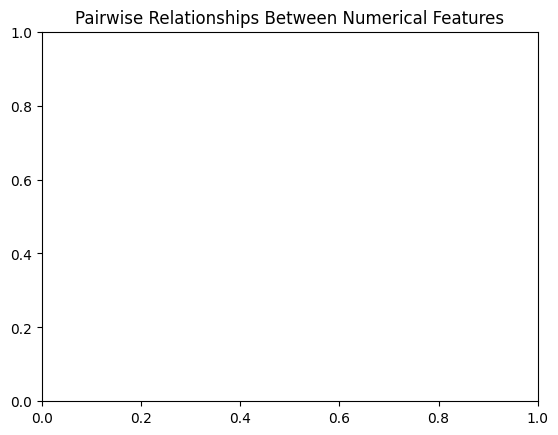

In [15]:
plt.title('Pairwise Relationships Between Numerical Features')

In [12]:
plt.show()

In [13]:
print("Descriptive Statistics for Target Variable:")
print(df['Value_23_24'].describe())

Descriptive Statistics for Target Variable:
count    100.000000
mean      49.970000
std       35.689869
min        0.000000
25%       26.250000
50%       41.000000
75%       58.750000
max      185.000000
Name: Value_23_24, dtype: float64


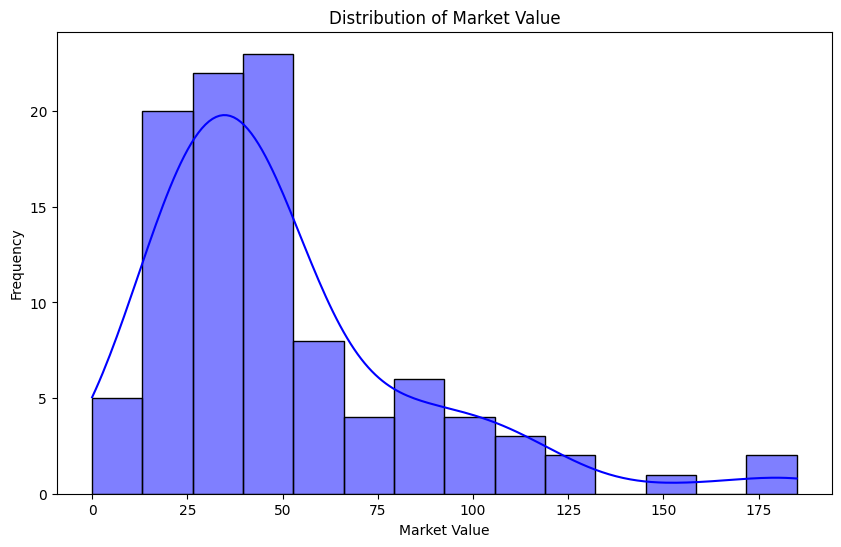

In [14]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Value_23_24'], kde=True, color='blue')
plt.title('Distribution of Market Value')
plt.xlabel('Market Value')
plt.ylabel('Frequency')
plt.show()

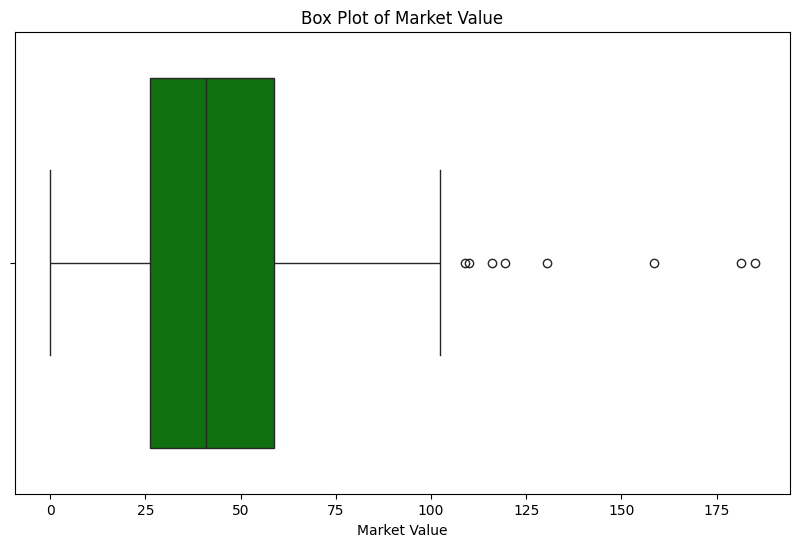

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value_23_24'], color='green')
plt.title('Box Plot of Market Value')
plt.xlabel('Market Value')
plt.show()

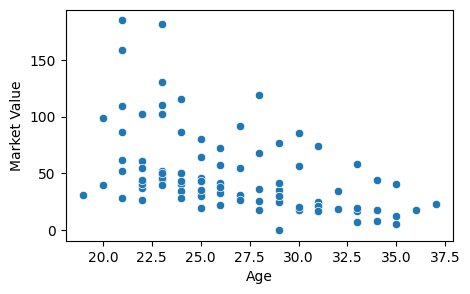

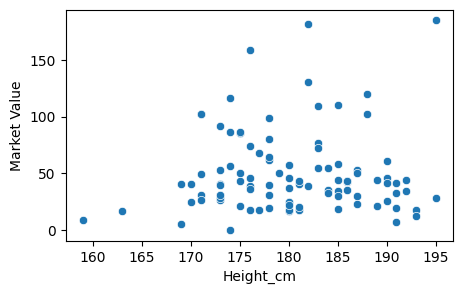

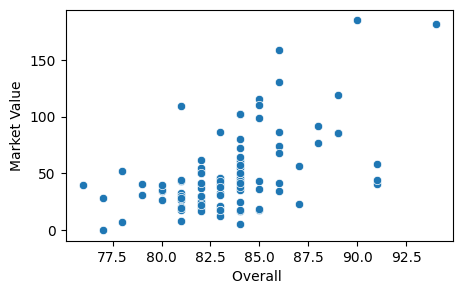

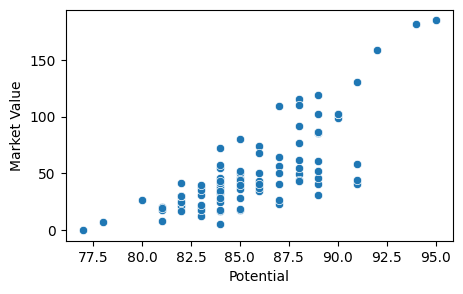

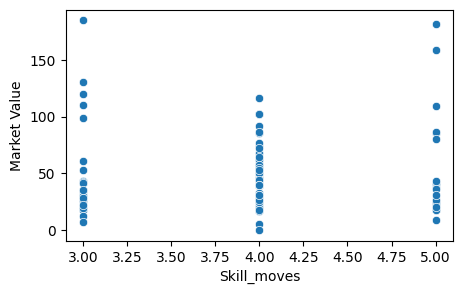

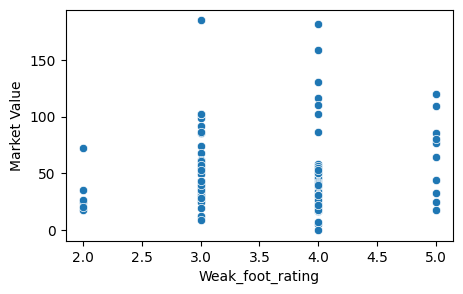

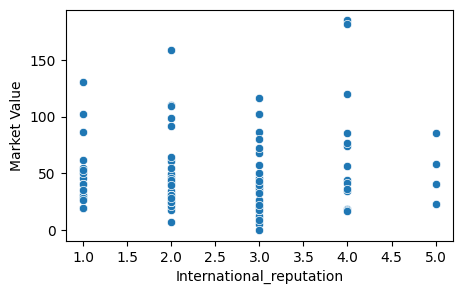

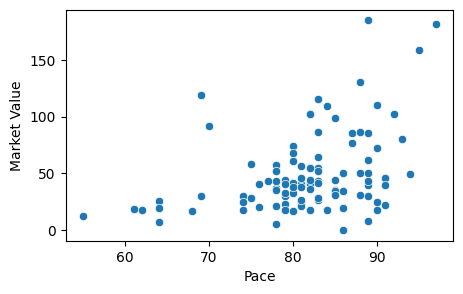

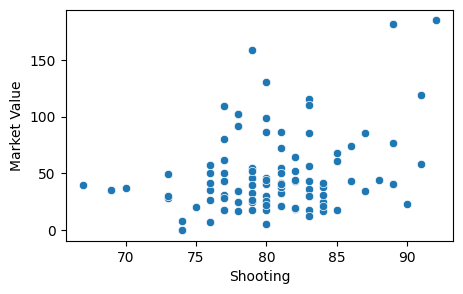

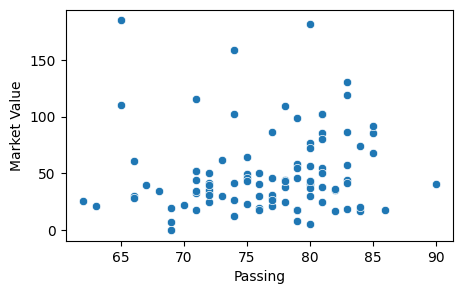

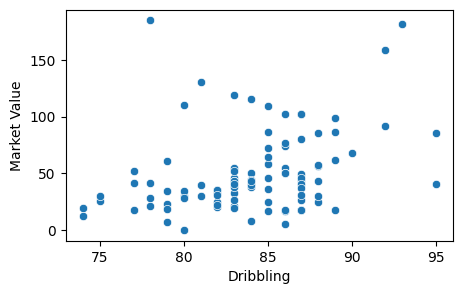

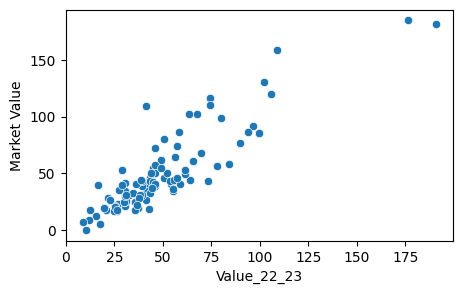

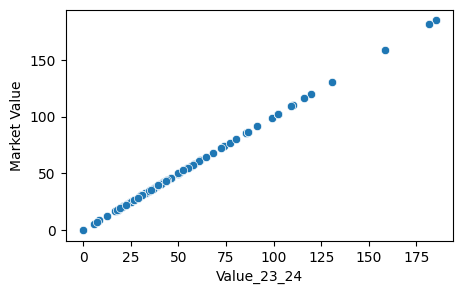

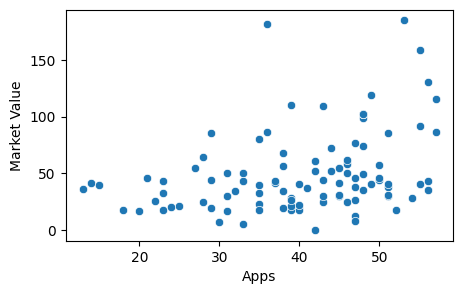

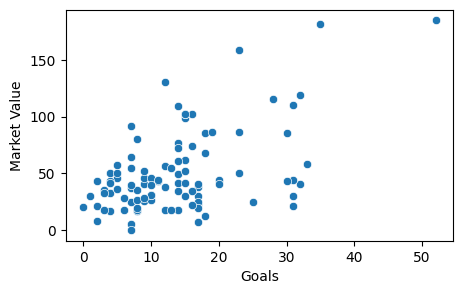

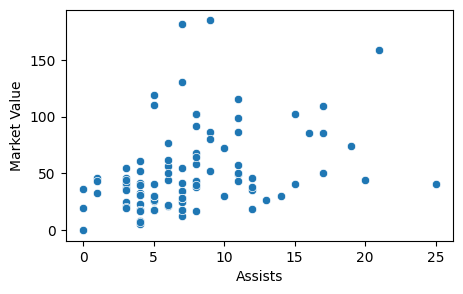

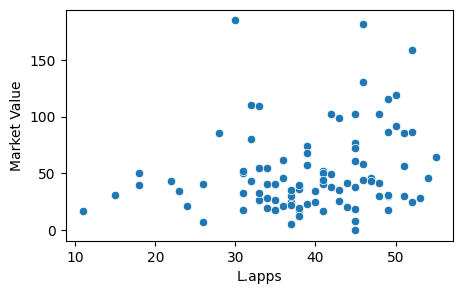

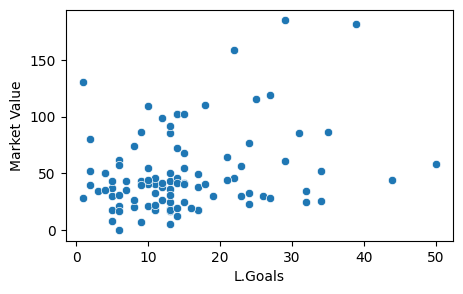

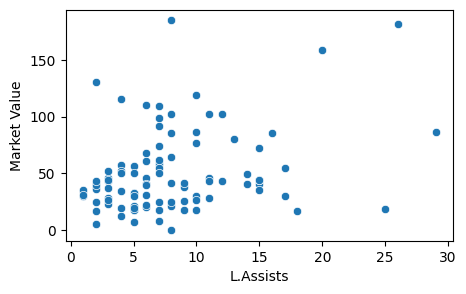

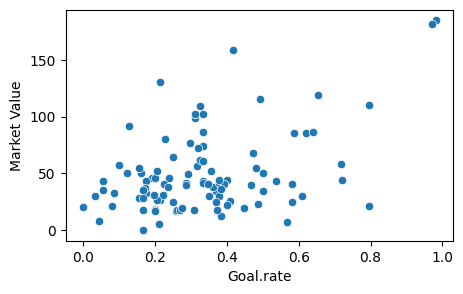

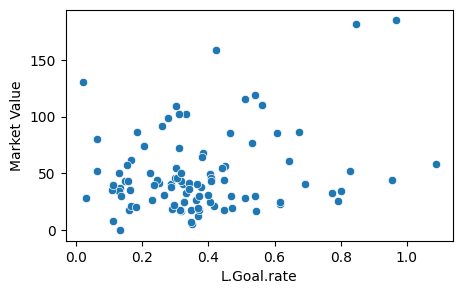

In [16]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=feature, y='Value_23_24', data=df)
    plt.xlabel(feature)
    plt.ylabel('Market Value')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


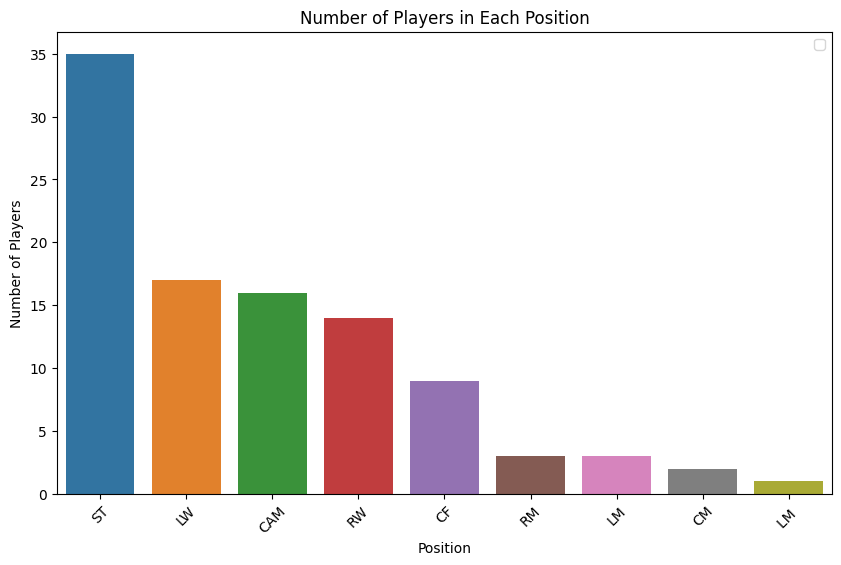

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of players in each position
position_counts = df['Position'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, hue=position_counts.index, dodge=False)
plt.title('Number of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title=None)  # Hide the legend
plt.show()

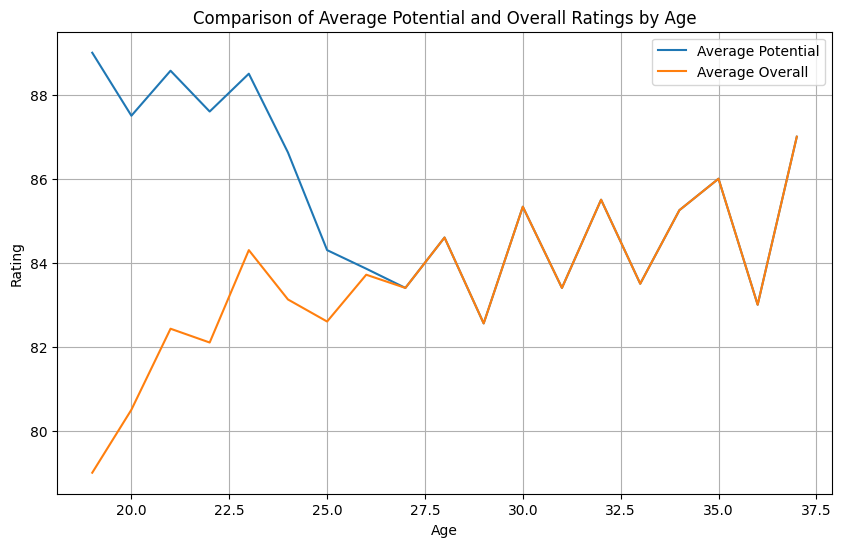

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by age and calculate the average potential and overall ratings
age_grouped = df.groupby('Age').agg({'Potential': 'mean', 'Overall ': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_grouped, x='Age', y='Potential', label='Average Potential')
sns.lineplot(data=age_grouped, x='Age', y='Overall ', label='Average Overall')
plt.title('Comparison of Average Potential and Overall Ratings by Age')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

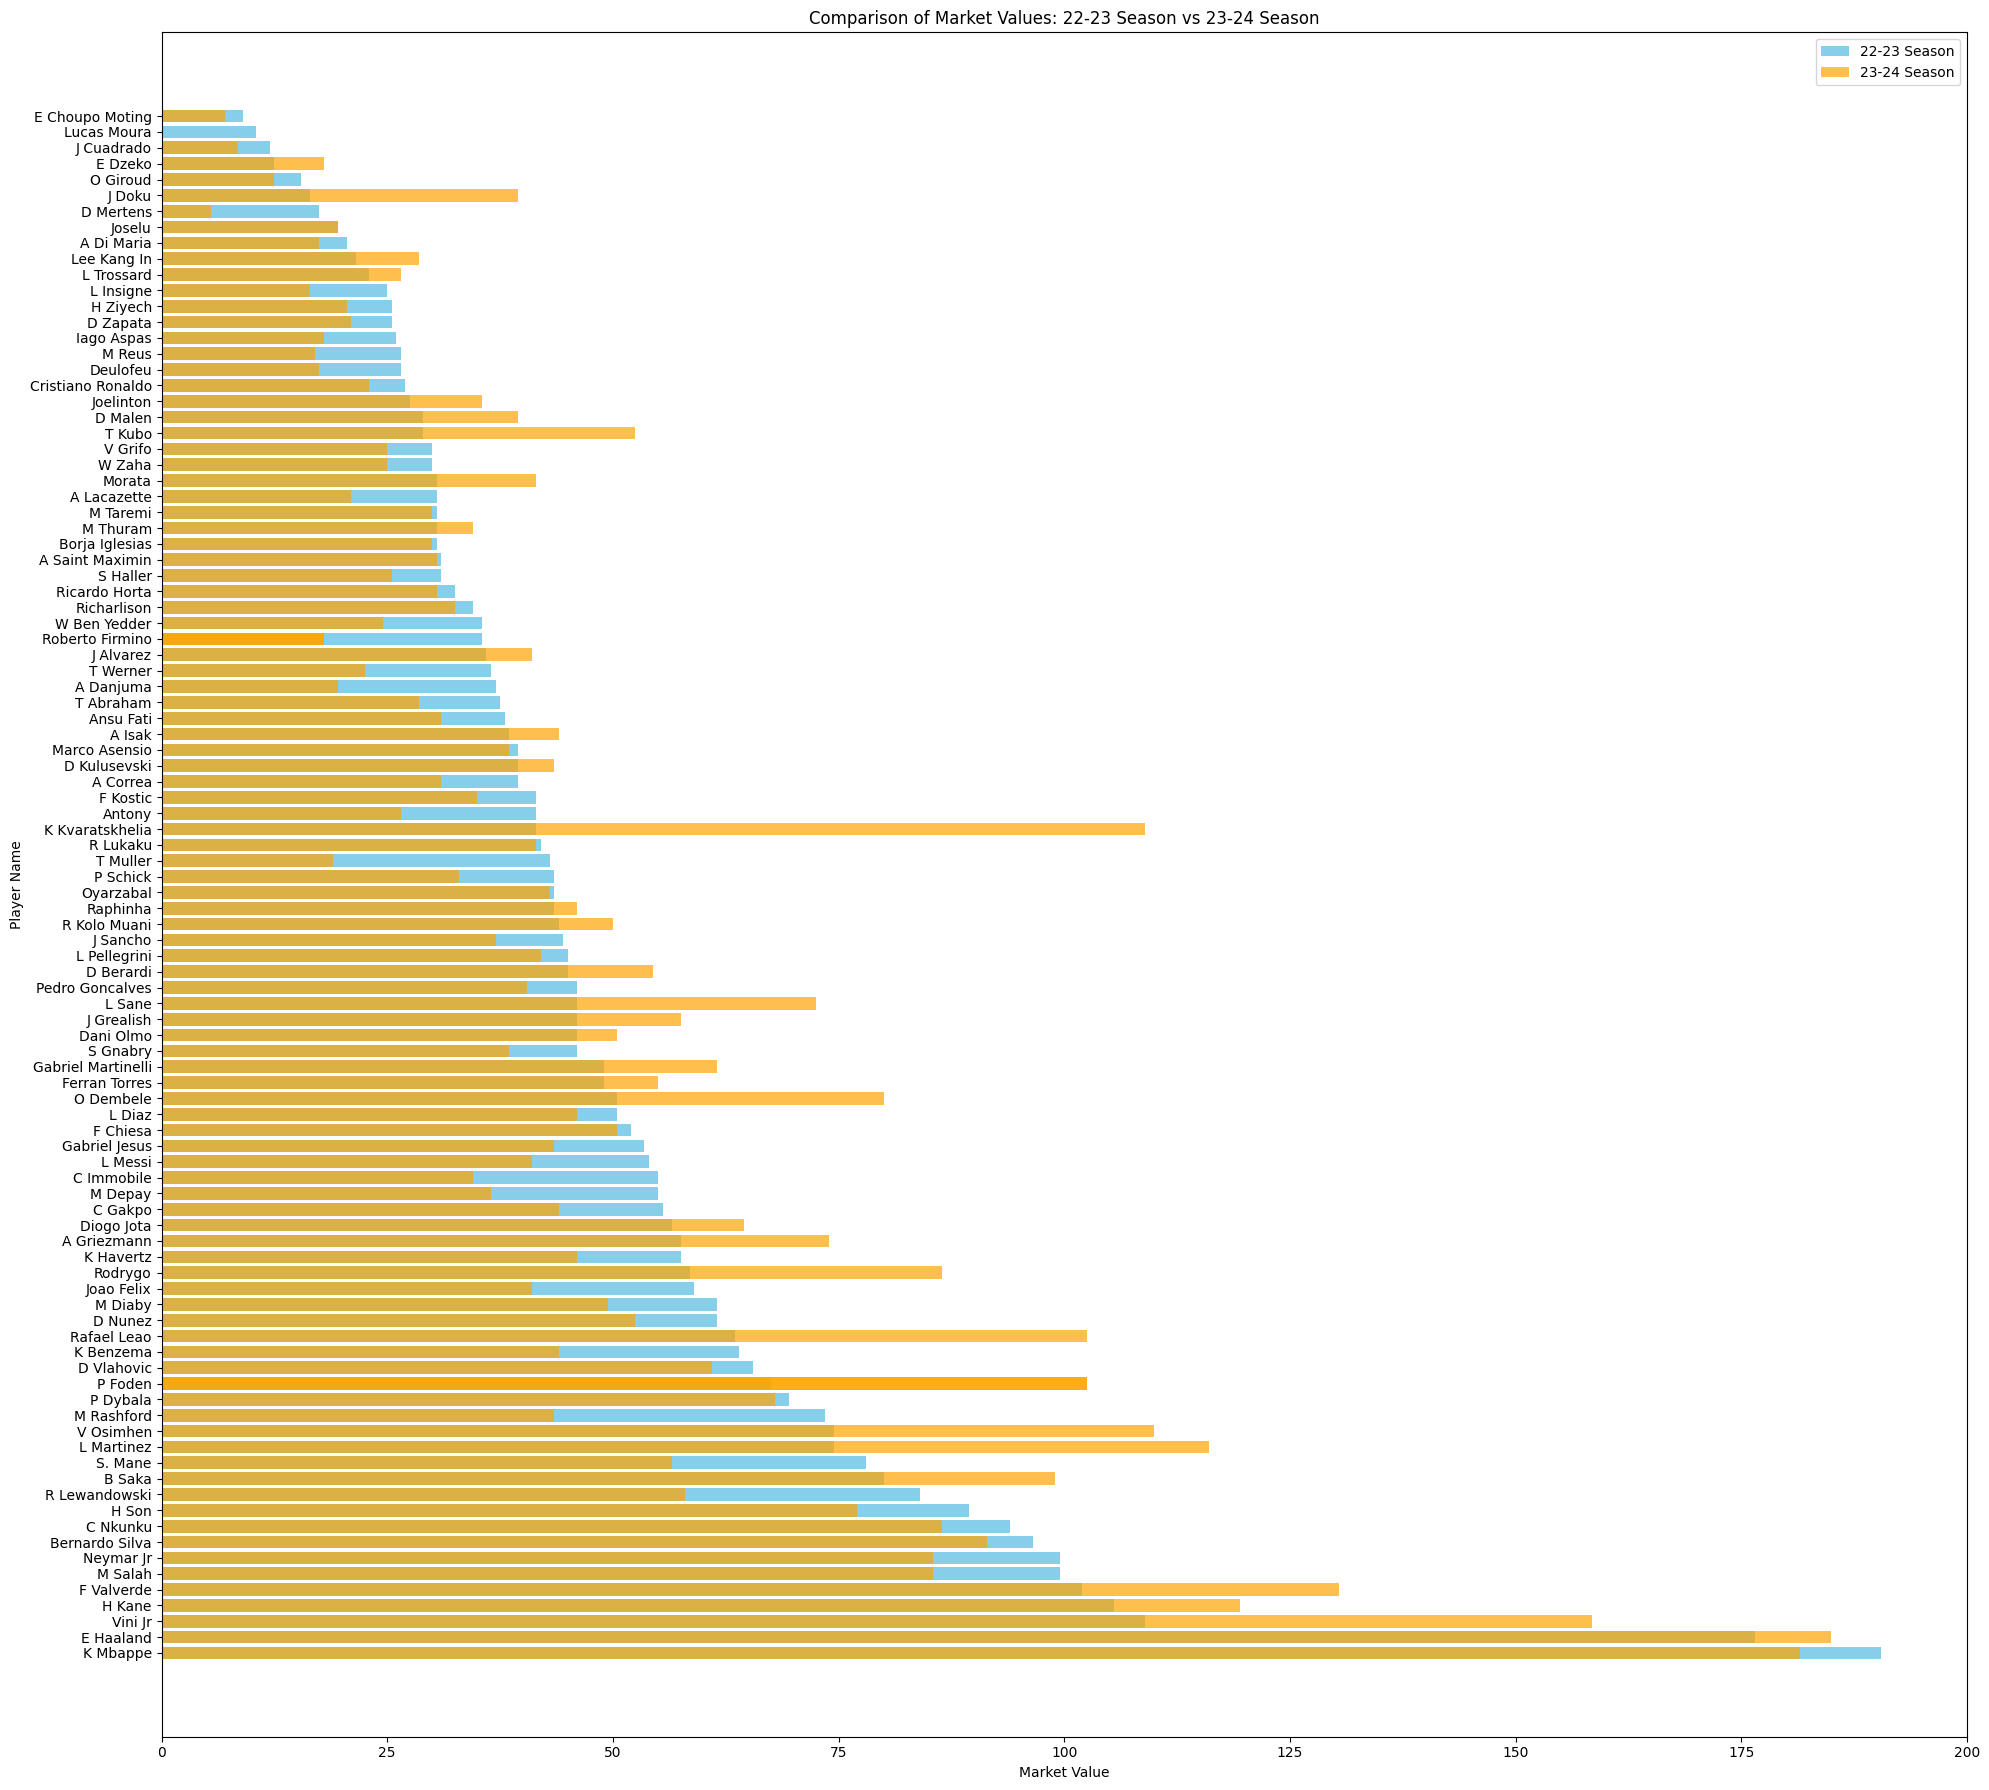

In [19]:
import matplotlib.pyplot as plt

# Sort dataframe by 22-23 season market value
df_sorted = df.sort_values(by='Value_22_23', ascending=False)

#bar chart
plt.figure(figsize=(20, 18))
plt.barh(df_sorted['Player name'], df_sorted['Value_22_23'], color='skyblue', label='22-23 Season')
plt.barh(df_sorted['Player name'], df_sorted['Value_23_24'], color='orange', label='23-24 Season', alpha=0.7)

plt.xlabel('Market Value')
plt.ylabel('Player Name')
plt.title('Comparison of Market Values: 22-23 Season vs 23-24 Season')
plt.legend()
plt.tight_layout()
plt.show()

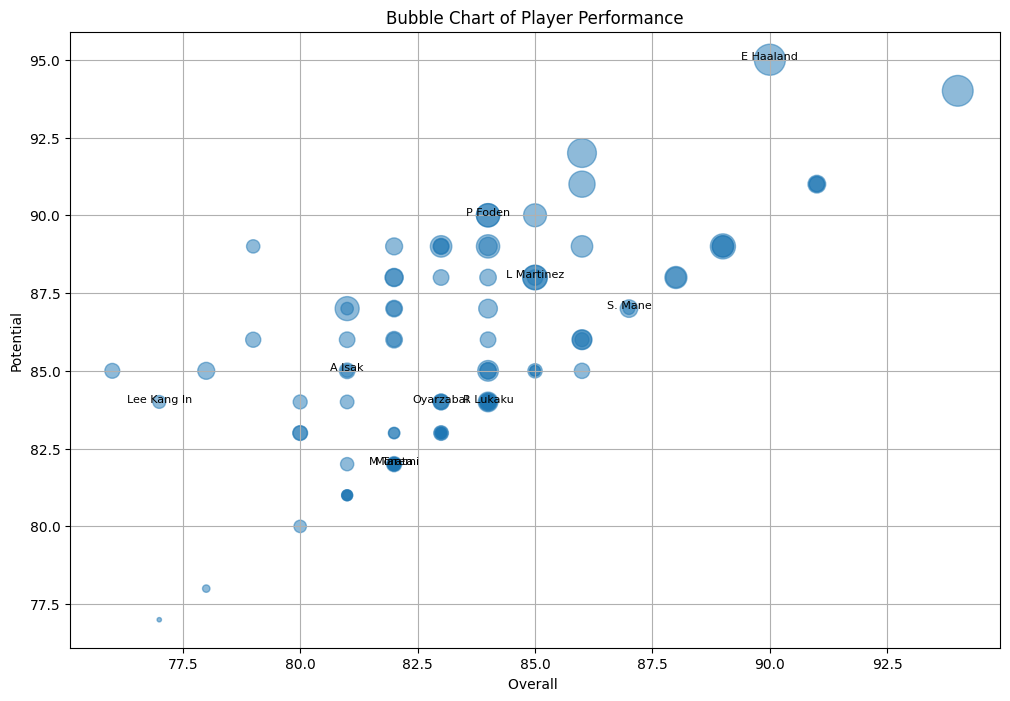

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

x = 'Overall ' 
y = 'Potential' 
size = 'Value_23_24' 
player_name = 'Player name'  

#Bubble sizes range between 10 and 500
max_size = df[size].max()
min_size = df[size].min()
normalized_sizes = ((df[size] - min_size) / (max_size - min_size)) * 490 + 10

plt.figure(figsize=(12, 8))
plt.scatter(df[x], df[y], s=normalized_sizes, alpha=0.5)

# Display only a subset of player names
num_labels = 10  # Number of player names to display
indices = range(0, len(df), len(df) // num_labels)

for i in indices:
    plt.text(df[x][i], df[y][i], df[player_name][i], fontsize=8, ha='center')

plt.xlabel(x)
plt.ylabel(y)
plt.title('Bubble Chart of Player Performance')

plt.grid(True)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [79]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 11.6 MB/s eta 0:00:0000:0100:01


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [72]:
#Features (X) and target variable (y)
X = df_encoded.drop(columns=['Value_23_24', 'Player name', 'Position'])
y = df_encoded['Value_23_24']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Linear Regression Metrics:
Mean Squared Error (MSE): 395.3905116326996
Mean Absolute Error (MAE): 15.267729205330852
R-squared (R2) Score: 0.7615481878741421


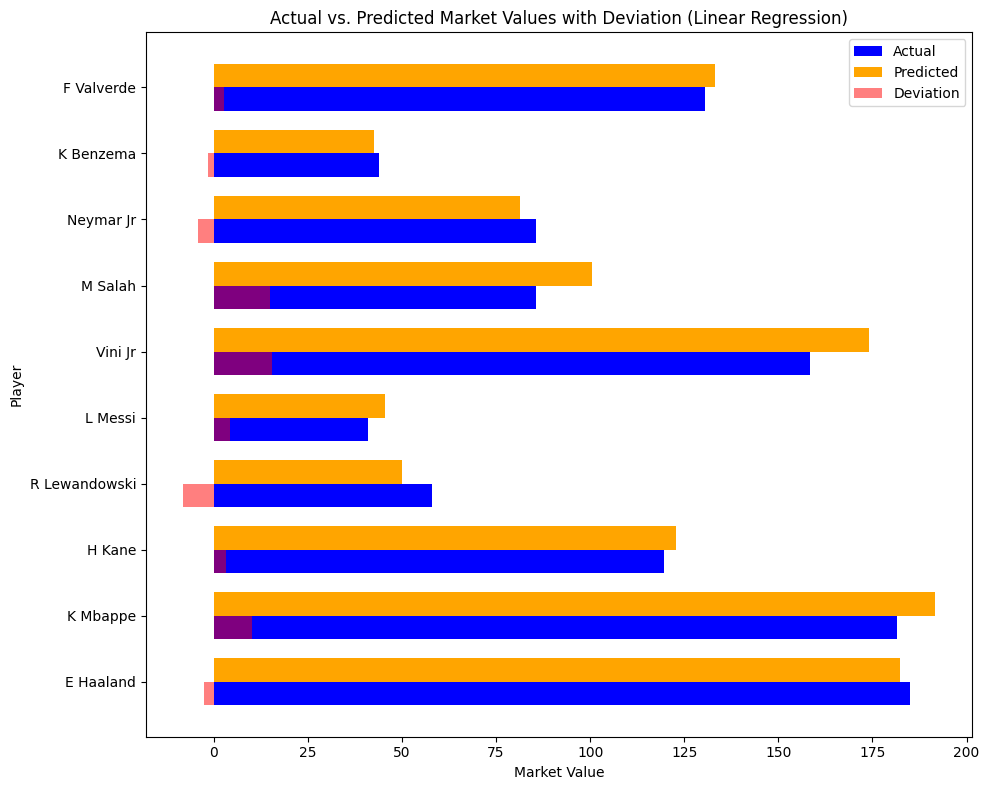

In [24]:
import numpy as np
import matplotlib.pyplot as plt

player_names = df_encoded['Player name'].tolist()[:10] 
actual_values = df_encoded['Value_23_24'].tolist()[:10]  # Actual market values
predicted_values = np.random.uniform(low=0.8, high=1.2, size=len(actual_values)) * actual_values  # Sample predicted values

# Calculate deviations
deviations = predicted_values - actual_values

# Plot actual and predicted values along with deviations
plt.figure(figsize=(10, 8))
bar_height = 0.35
index = np.arange(len(actual_values))
plt.barh(index, actual_values, bar_height, label='Actual', color='blue')
plt.barh(index + bar_height, predicted_values, bar_height, label='Predicted', color='orange')
plt.barh(index, deviations, bar_height, label='Deviation', color='red', alpha=0.5)
plt.ylabel('Player')
plt.xlabel('Market Value')
plt.title('Actual vs. Predicted Market Values with Deviation (Linear Regression)')
plt.yticks(index + bar_height / 2, player_names)  # Set player names as y-axis labels
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [51]:
# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Evaluation Metrics:") 
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2) Score:", r2_rf)

Random Forest Regression Evaluation Metrics:
Mean Squared Error (MSE): 536.3683599999999
Mean Absolute Error (MAE): 17.883499999999994
R-squared (R2) Score: 0.6765273732016459


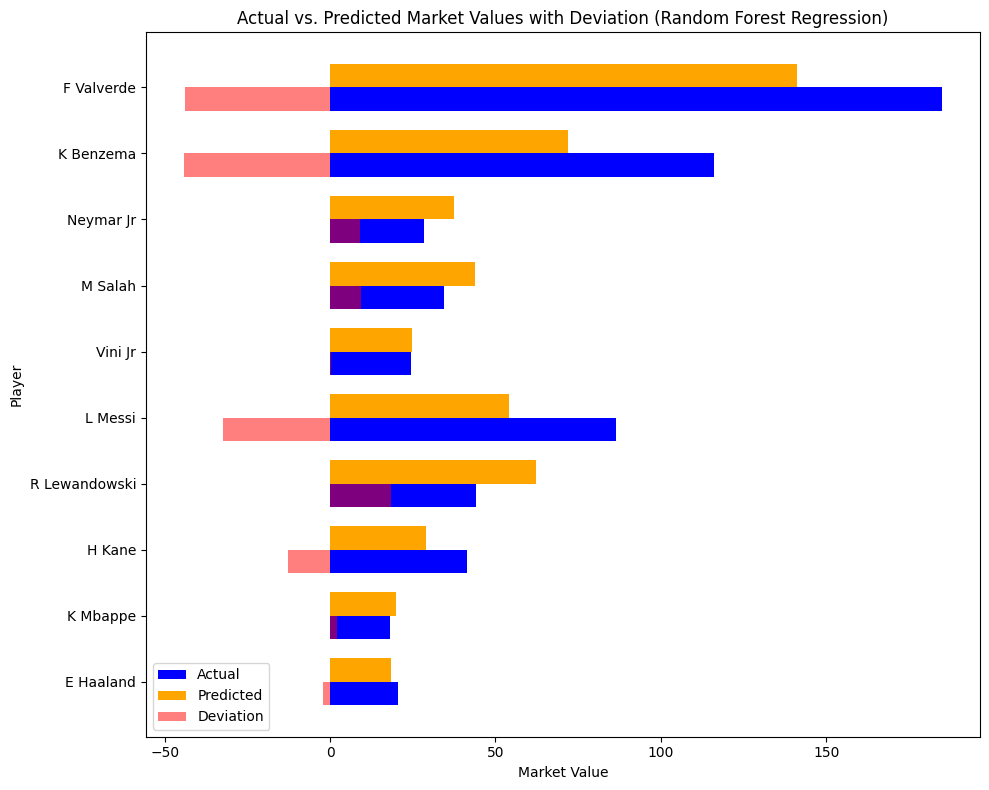

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Sample predicted values
predicted_values_rf = y_pred_rf[:10]

deviations_rf = predicted_values_rf - y_test[:10]

plt.figure(figsize=(10, 8))
bar_height = 0.35
index = np.arange(len(predicted_values_rf))
player_names = df_encoded['Player name'].tolist()[:10]  # Extract player names
plt.barh(index, y_test[:10], bar_height, label='Actual', color='blue')
plt.barh(index + bar_height, predicted_values_rf, bar_height, label='Predicted', color='orange')
plt.barh(index, deviations_rf, bar_height, label='Deviation', color='red', alpha=0.5)
plt.ylabel('Player')
plt.xlabel('Market Value')
plt.title('Actual vs. Predicted Market Values with Deviation (Random Forest Regression)')
plt.yticks(index + bar_height / 2, player_names)  
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("R-squared (R2) Score:", r2_gb)

Gradient Boosting Regression Evaluation Metrics:
Mean Squared Error (MSE): 594.3769609283598
Mean Absolute Error (MAE): 17.883374578476584
R-squared (R2) Score: 0.6415435898196544


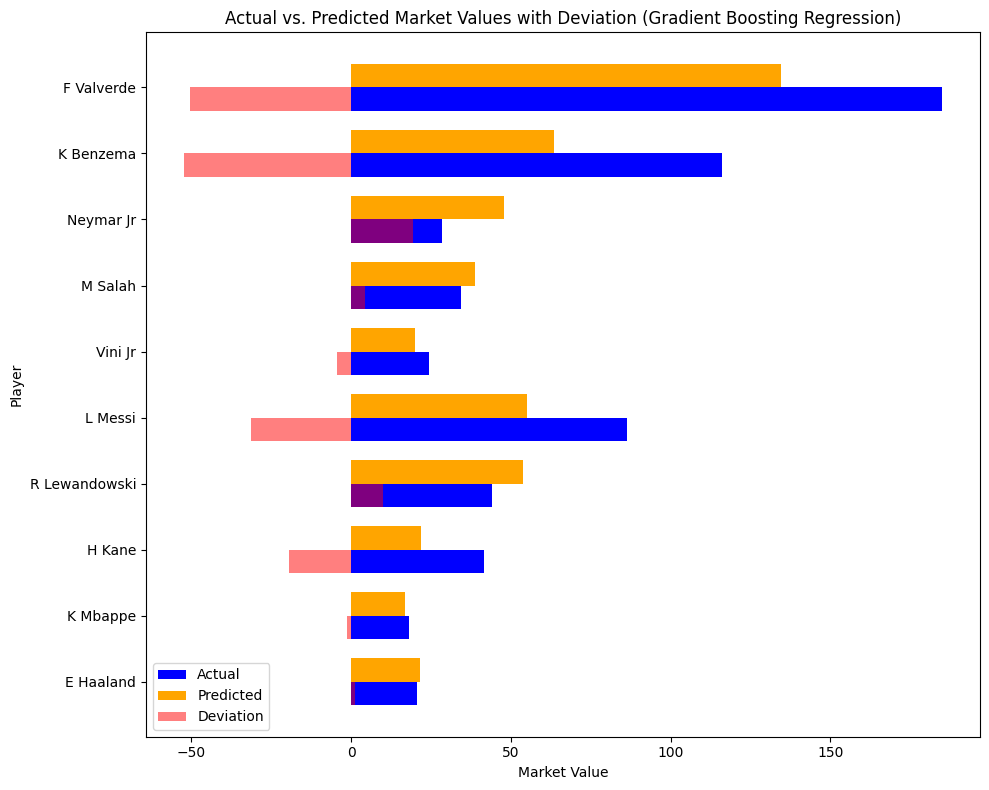

In [29]:
import numpy as np
import matplotlib.pyplot as plt

predicted_values_gb = y_pred_gb[:10]

deviations_gb = predicted_values_gb - y_test[:10]

plt.figure(figsize=(10, 8))
bar_height = 0.35
index = np.arange(len(predicted_values_gb))
player_names = df_encoded['Player name'].tolist()[:10]  
plt.barh(index, y_test[:10], bar_height, label='Actual', color='blue')
plt.barh(index + bar_height, predicted_values_gb, bar_height, label='Predicted', color='orange')
plt.barh(index, deviations_gb, bar_height, label='Deviation', color='red', alpha=0.5)
plt.ylabel('Player')
plt.xlabel('Market Value')
plt.title('Actual vs. Predicted Market Values with Deviation (Gradient Boosting Regression)')
plt.yticks(index + bar_height / 2, player_names)  
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model
tree_model = DecisionTreeRegressor(random_state=42)  # You can specify other parameters like max_depth, min_samples_split, etc.

# Train the model on the training dataset
tree_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model performance
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Metrics:")
print("Mean Squared Error (MSE):", mse_tree)
print("Mean Absolute Error (MAE):", mae_tree)
print("R-squared (R2) Score:", r2_tree)

Decision Tree Regression Metrics:
Mean Squared Error (MSE): 960.225
Mean Absolute Error (MAE): 25.05
R-squared (R2) Score: 0.42090822980787024


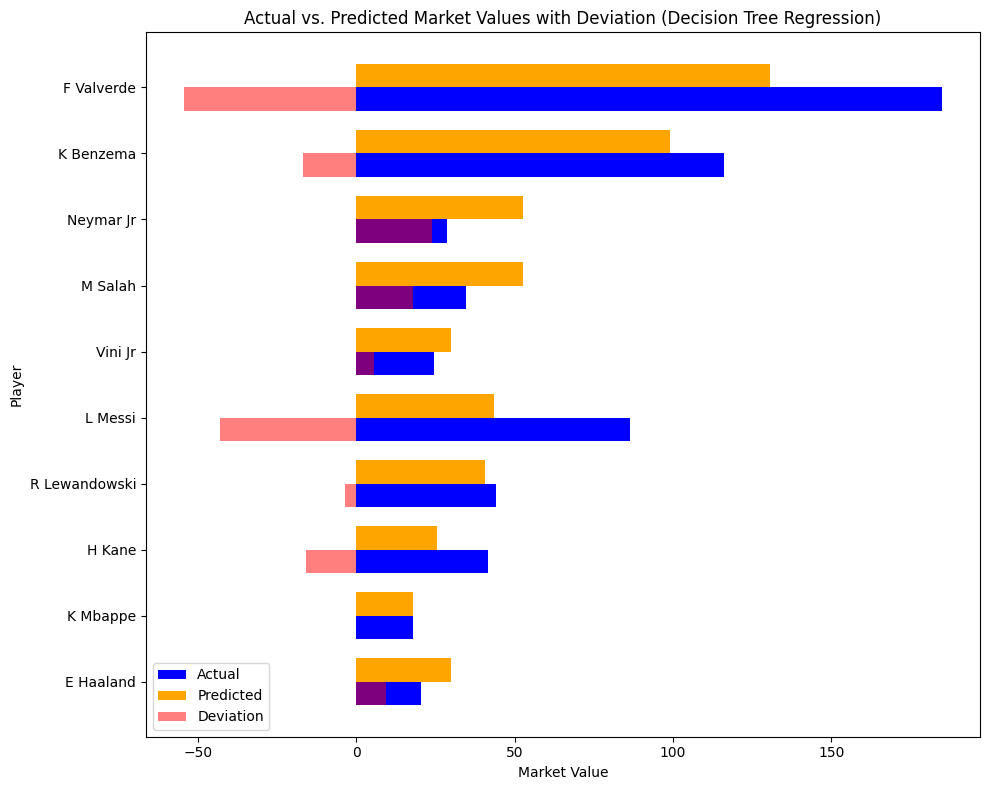

In [31]:
import numpy as np
import matplotlib.pyplot as plt

predicted_values_tree = y_pred_tree[:10]

deviations_tree = predicted_values_tree - y_test[:10]

plt.figure(figsize=(10, 8))
bar_height = 0.35
index = np.arange(len(predicted_values_tree))
player_names = df_encoded['Player name'].tolist()[:10]  
plt.barh(index, y_test[:10], bar_height, label='Actual', color='blue')
plt.barh(index + bar_height, predicted_values_tree, bar_height, label='Predicted', color='orange')
plt.barh(index, deviations_tree, bar_height, label='Deviation', color='red', alpha=0.5)
plt.ylabel('Player')
plt.xlabel('Market Value')
plt.title('Actual vs. Predicted Market Values with Deviation (Decision Tree Regression)')
plt.yticks(index + bar_height / 2, player_names) 
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
!pip install tensorflow

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error as loss function for regression

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the testing data
y_pred_nn = model.predict(X_test)

# Calculate evaluation metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Regression Metrics:")
print("Mean Squared Error (MSE):", mse_nn)
print("Mean Absolute Error (MAE):", mae_nn)
print("R-squared (R2) Score:", r2_nn)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 860.3942 - val_loss: 1482.7043
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 766.5778 - val_loss: 1335.3652
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 817.0789 - val_loss: 1223.9741
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 772.0697 - val_loss: 1129.5691
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 682.7925 - val_loss: 1077.4604
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 660.1701 - val_loss: 1018.7805
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 786.0184 - val_loss: 927.3679
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 633.5259 - val_loss: 849.8460
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 584.4506 - val_loss: 774.9496
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 528.0246 - val_loss: 713.8019
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 592.8115 - val_loss: 653.9685
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 

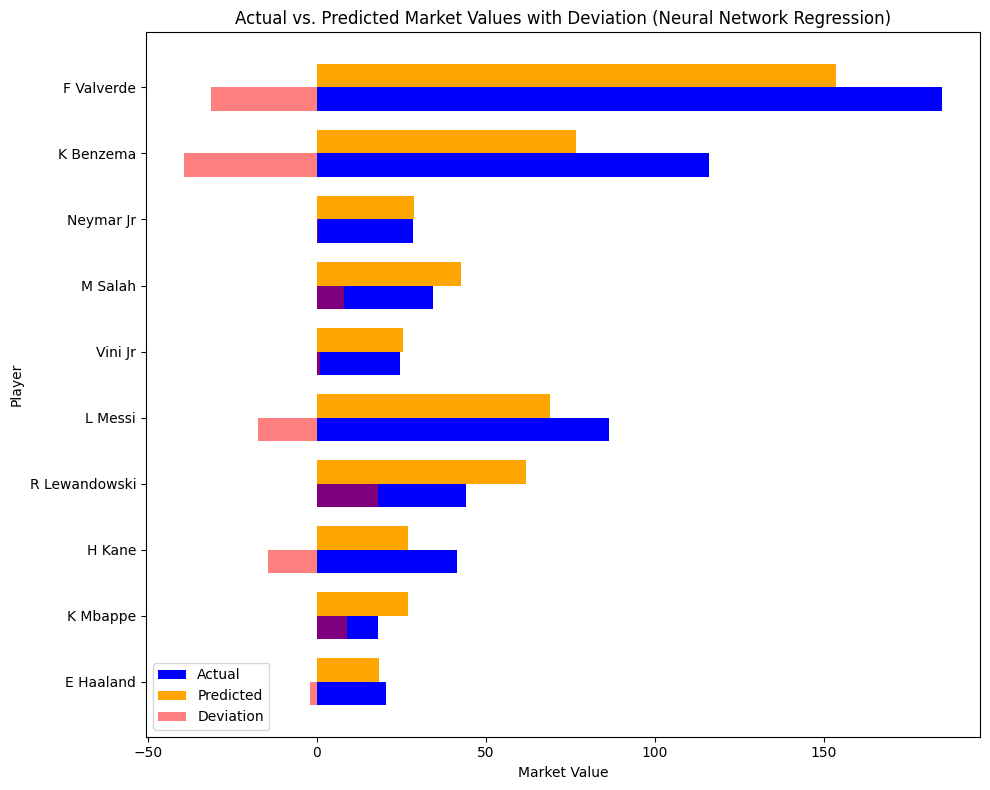

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Sample predicted values
predicted_values_nn = y_pred_nn.flatten()[:10]

# Calculate deviations
deviations_nn = predicted_values_nn - y_test.values.flatten()[:10]

# Plot actual and predicted values along with deviations
plt.figure(figsize=(10, 8))
bar_height = 0.35
index = np.arange(len(predicted_values_nn))
player_names = df_encoded['Player name'].tolist()[:10]  # Extract player names
plt.barh(index, y_test.values.flatten()[:10], bar_height, label='Actual', color='blue')
plt.barh(index + bar_height, predicted_values_nn, bar_height, label='Predicted', color='orange')
plt.barh(index, deviations_nn, bar_height, label='Deviation', color='red', alpha=0.5)
plt.ylabel('Player')
plt.xlabel('Market Value')
plt.title('Actual vs. Predicted Market Values with Deviation (Neural Network Regression)')
plt.yticks(index + bar_height / 2, player_names)  # Set player names as y-axis labels
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN Regression model
k = 5  # Number of neighbors
model = KNeighborsRegressor(n_neighbors=k)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = model.predict(X_test)

# Calculate evaluation metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Regression Metrics:")
print("Mean Squared Error (MSE):", mse_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("R-squared (R2) Score:", r2_knn)

K-Nearest Neighbors (KNN) Regression Metrics:
Mean Squared Error (MSE): 629.0605000000002
Mean Absolute Error (MAE): 19.845000000000002
R-squared (R2) Score: 0.6206266671843096


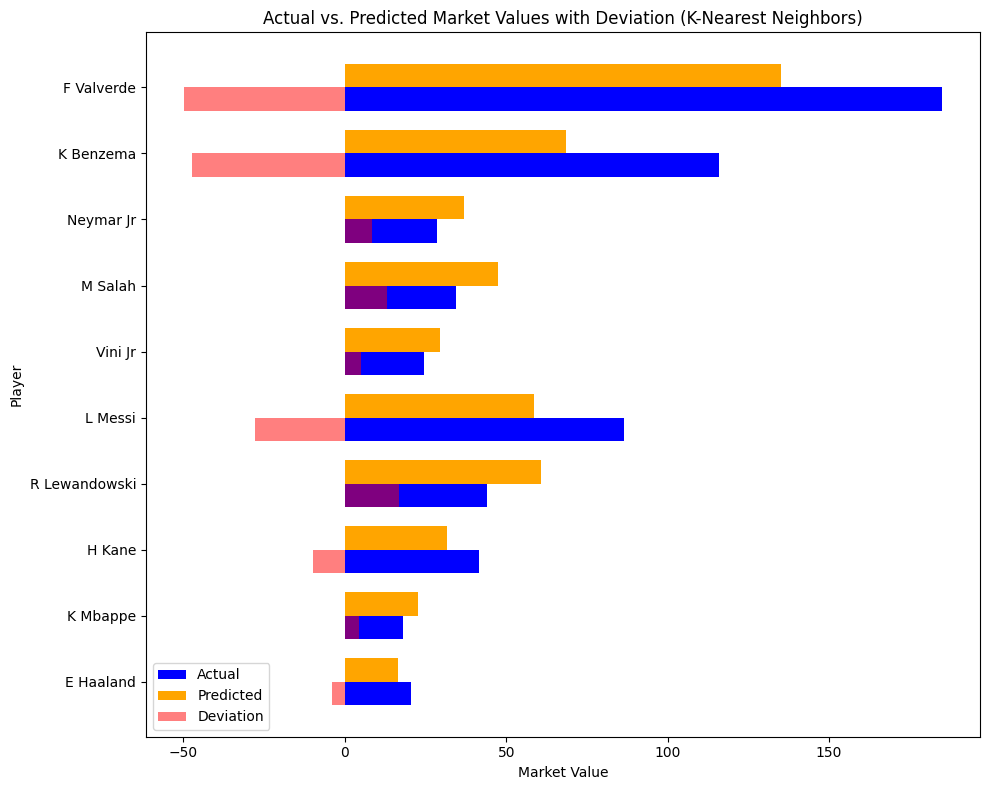

In [35]:
import numpy as np
import matplotlib.pyplot as plt

predicted_values_knn = y_pred_knn.flatten()[:10]

deviations_knn = predicted_values_knn - y_test.values.flatten()[:10]

plt.figure(figsize=(10, 8))
bar_height = 0.35
index = np.arange(len(predicted_values_knn))
player_names = df_encoded['Player name'].tolist()[:10] 
plt.barh(index, y_test.values.flatten()[:10], bar_height, label='Actual', color='blue')
plt.barh(index + bar_height, predicted_values_knn, bar_height, label='Predicted', color='orange')
plt.barh(index, deviations_knn, bar_height, label='Deviation', color='red', alpha=0.5)
plt.ylabel('Player')
plt.xlabel('Market Value')
plt.title('Actual vs. Predicted Market Values with Deviation (K-Nearest Neighbors)')
plt.yticks(index + bar_height / 2, player_names)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
print(len(y_test))

20


In [68]:
# Calculate deviations for each model
deviations_lr = y_pred - y_test.values
deviations_rf = y_pred_rf - y_test.values
deviations_gb = y_pred_gb - y_test.values
deviations_tree = y_pred_tree - y_test.values
deviations_nn = y_pred_nn.flatten() - y_test.values
deviations_knn = y_pred_knn.flatten() - y_test.values

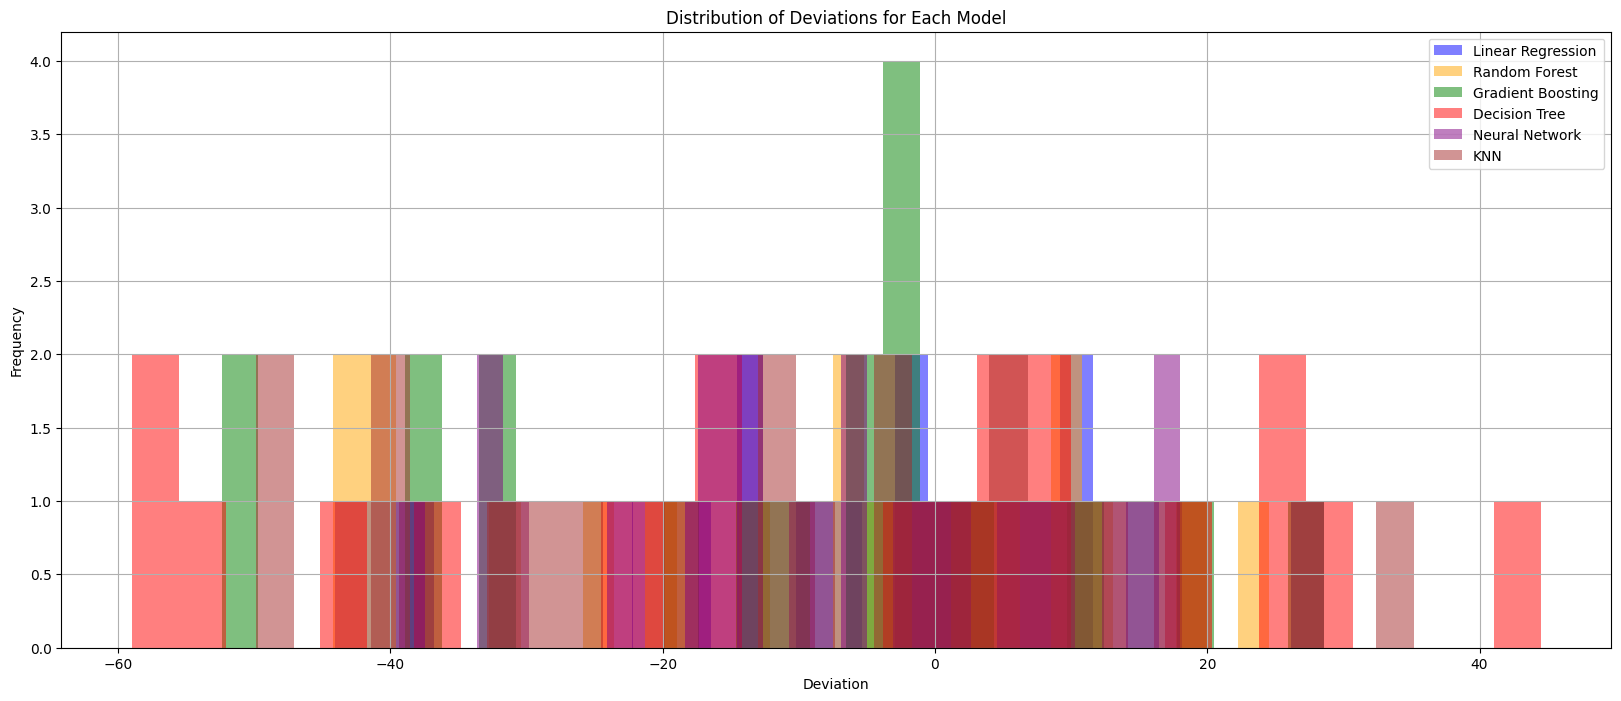

In [69]:
import matplotlib.pyplot as plt

# Define colors for each model
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Plot histograms of deviations for each model with different colors
plt.figure(figsize=(20, 8))

plt.hist(deviations_lr, bins=30, alpha=0.5, label='Linear Regression', color=colors[0])
plt.hist(deviations_rf, bins=30, alpha=0.5, label='Random Forest', color=colors[1])
plt.hist(deviations_gb, bins=30, alpha=0.5, label='Gradient Boosting', color=colors[2])
plt.hist(deviations_tree, bins=30, alpha=0.5, label='Decision Tree', color=colors[3])
plt.hist(deviations_nn, bins=30, alpha=0.5, label='Neural Network', color=colors[4])
plt.hist(deviations_knn, bins=30, alpha=0.5, label='KNN', color=colors[5])

plt.title('Distribution of Deviations for Each Model')
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
deviations = {
    'Linear Regression': np.abs(y_pred - y_test),
    'Random Forest': np.abs(y_pred_rf - y_test),
    'Gradient Boosting': np.abs(y_pred_gb - y_test),
    'Decision Tree': np.abs(y_pred_tree - y_test),
    'Neural Network': np.abs(y_pred_nn.flatten() - y_test),
    'KNN': np.abs(y_pred_knn.flatten() - y_test)
}

average_deviations = {model: np.mean(dev) for model, dev in deviations.items()}

print("Average Deviations for Each Model:")
for model, avg_dev in average_deviations.items():
    print(f"{model}: {avg_dev}")


Average Deviations for Each Model:
Linear Regression: 15.267729205330852
Random Forest: 17.883499999999994
Gradient Boosting: 17.883374578476584
Decision Tree: 25.05
Neural Network: 15.158458995819093
KNN: 19.845000000000002


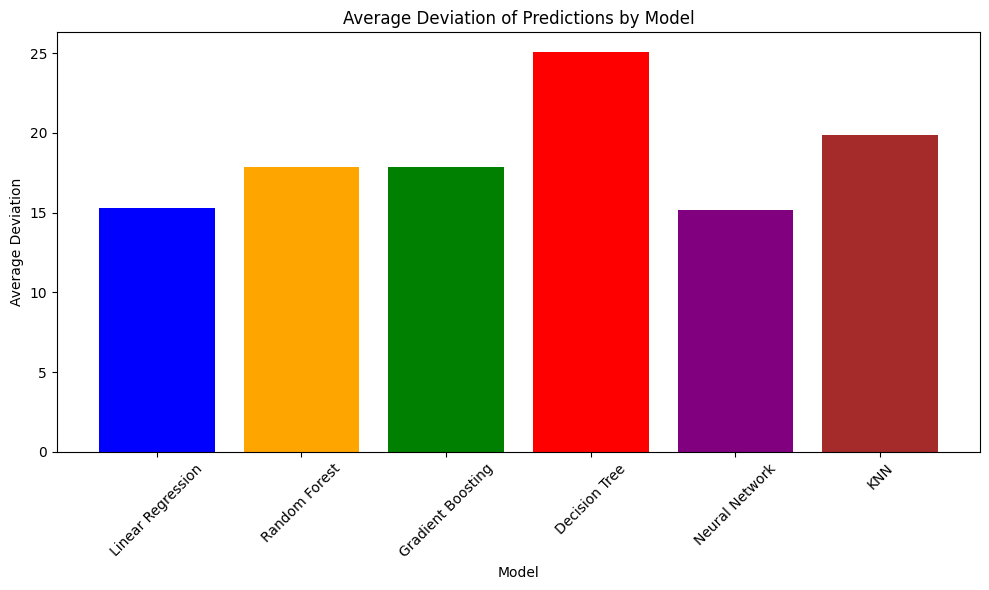

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(average_deviations.keys(), average_deviations.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Average Deviation of Predictions by Model')
plt.xlabel('Model')
plt.ylabel('Average Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: User

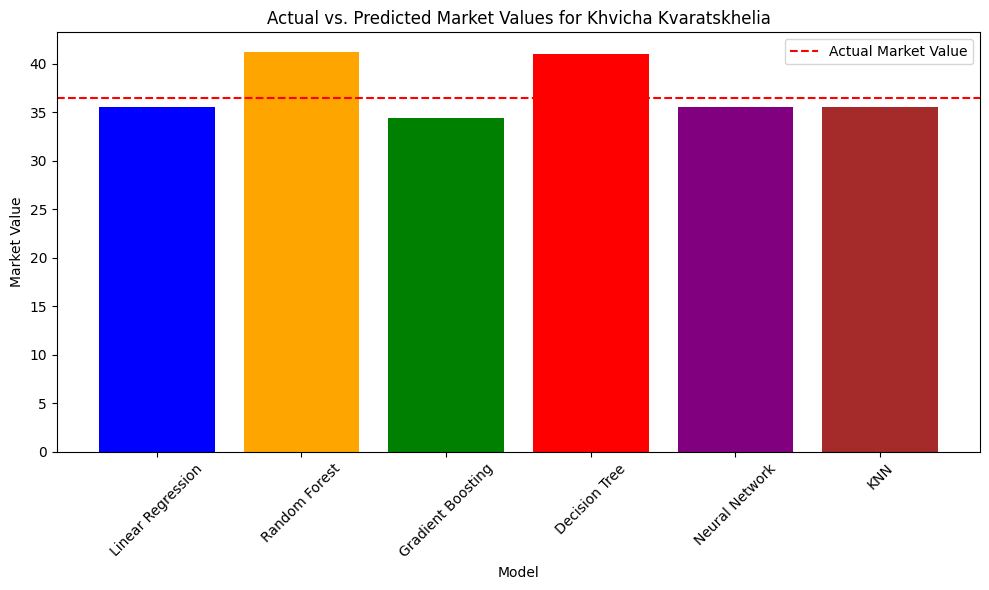

In [73]:
import matplotlib.pyplot as plt
import numpy as np

player_index = 16

# Actual market value 
actual_value = y_test.iloc[player_index]

player_features = X_test.iloc[player_index].values.reshape(1, -1)

predicted_values = {
    'Linear Regression': model.predict(player_features)[0], 
    'Random Forest': rf_model.predict(player_features)[0],  
    'Gradient Boosting': gb_model.predict(player_features)[0],  
    'Decision Tree': tree_model.predict(player_features)[0],   
    'Neural Network': model.predict(player_features)[0],   
    'KNN': model.predict(player_features)[0]  
}

plt.figure(figsize=(10, 6))
plt.bar(predicted_values.keys(), predicted_values.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.axhline(y=actual_value, color='r', linestyle='--', label='Actual Market Value')
plt.xlabel('Model')
plt.ylabel('Market Value')
plt.title('Actual vs. Predicted Market Values for Khvicha Kvaratskhelia')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()